In [9]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import numpy as np
from LowLevelModules.GeneralFunctions import get_work_dir, TRMData, MyPlot
import ipywidgets as widgets
from IPython.display import display

def g2(t, t0, tau, N):
    return (N-1)/N + 1/N*(1-np.exp(-abs(t-t0)/tau))

wdir = r"Z:\Projects\WSe2\2020\02 february\20200224 - WSe2 hBN gated\5K data\g2"

filenames = [f[:-4] for f in os.listdir(wdir) if '.sdt' in f]
file_choice = widgets.RadioButtons(options=filenames,
                                     value=filenames[0],
                                     description='file')
display(file_choice)

RadioButtons(description='file', options=('WSe2_hBN_spotTBD_760nW_728exc',), value='WSe2_hBN_spotTBD_760nW_728…

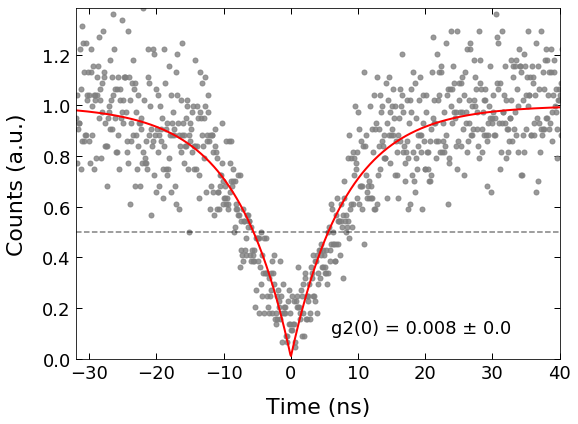

In [10]:
sdt_data_path = wdir + '//' + file_choice.value + '.sdt'
data = TRMData(sdt_data_path)

delay = -31.94
x = data.x + delay

#normalization
norm = float(data.APD1_rate * data.APD2_rate * data.bin_size * data.col_t)
y = np.divide(data.y, np.mean(data.y[656:]), casting="unsafe")
#y = np.divide(y, norm, casting="unsafe")
pl = MyPlot(1, 1, xlabel='Time (ns)', ylabel='Counts (a.u.)')
pl.plot(x, y, 'o', markersize=5, c='grey', alpha=0.8)
pl.plot([x[0], x[-1]], [0.5, 0.5], 'k--', alpha=.5)

#do the fit
coeffs, pcov = curve_fit(g2, x, y)
perr = np.sqrt(np.diag(pcov))
g20 = 1-1/coeffs[2]
perr_g2 = g20 * perr[2] / coeffs[2]
y_arrf = g2(x, *coeffs)
pl.plot(x, y_arrf, 'r-', linewidth=2)

pl.ax.set_xlim([-32, 40])
pl.ax.set_ylim([0, np.max(y)])
pl.ax.text(6, 0.1, f"g2(0) = {np.round(g20, 3)} ± {np.round(perr_g2, 3)}", fontsize=18)
pl.savefig(wdir + "//" + file_choice.value + '.png')

In [6]:
data.APD2_rate

18944.0